<a href="https://colab.research.google.com/github/kridtapon/Williams-SMI-Ergodic-Strategy/blob/main/Williams_%2B_SMI_Ergodic_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate SMI Ergodic Oscillator
def calculate_smi(df, period=14, smooth=3):
    high_low = df['High'] - df['Low']
    high_low_ema = high_low.ewm(span=period, adjust=False).mean()
    close_diff = df['Close'] - df['Close'].shift(period)
    close_ema = close_diff.ewm(span=period, adjust=False).mean()
    smi = 100 * (close_ema / high_low_ema)
    smi_signal = smi.ewm(span=smooth, adjust=False).mean()
    return smi, smi_signal

# Function to calculate Williams %R
def calculate_williams_r(df, period=14):
    highest_high = df['High'].rolling(window=period).max()
    lowest_low = df['Low'].rolling(window=period).min()
    williams_r = -100 * (highest_high - df['Close']) / (highest_high - lowest_low)
    return williams_r

# Define the stock symbol and time period
symbol = 'RL' # RL
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate indicators
df['SMI'], df['SMI_Signal'] = calculate_smi(df, period=14, smooth=3)
df['Williams_R'] = calculate_williams_r(df, period=14)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on SMI Ergodic Oscillator and Williams %R
df['Entry'] = (df['SMI'] > 0) & (df['Williams_R'] < -80)
df['Exit'] = (df['SMI'] < 0) & (df['Williams_R'] > -20)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           220624.800112
Total Return [%]                         120.6248
Benchmark Return [%]                   114.566619
Max Gross Exposure [%]                      100.0
Total Fees Paid                       5346.937082
Max Drawdown [%]                        50.197831
Max Drawdown Duration           280 days 00:00:00
Total Trades                                   22
Total Closed Trades                            21
Total Open Trades                               1
Open Trade PnL                       31673.277419
Win Rate [%]                            85.714286
Best Trade [%]                          25.510543
Worst Trade [%]                        -31.202341
Avg Winning Trade [%]                    6.302761
Avg Losing Trade [%]                   -12.206205


[*********************100%***********************]  1 of 1 completed


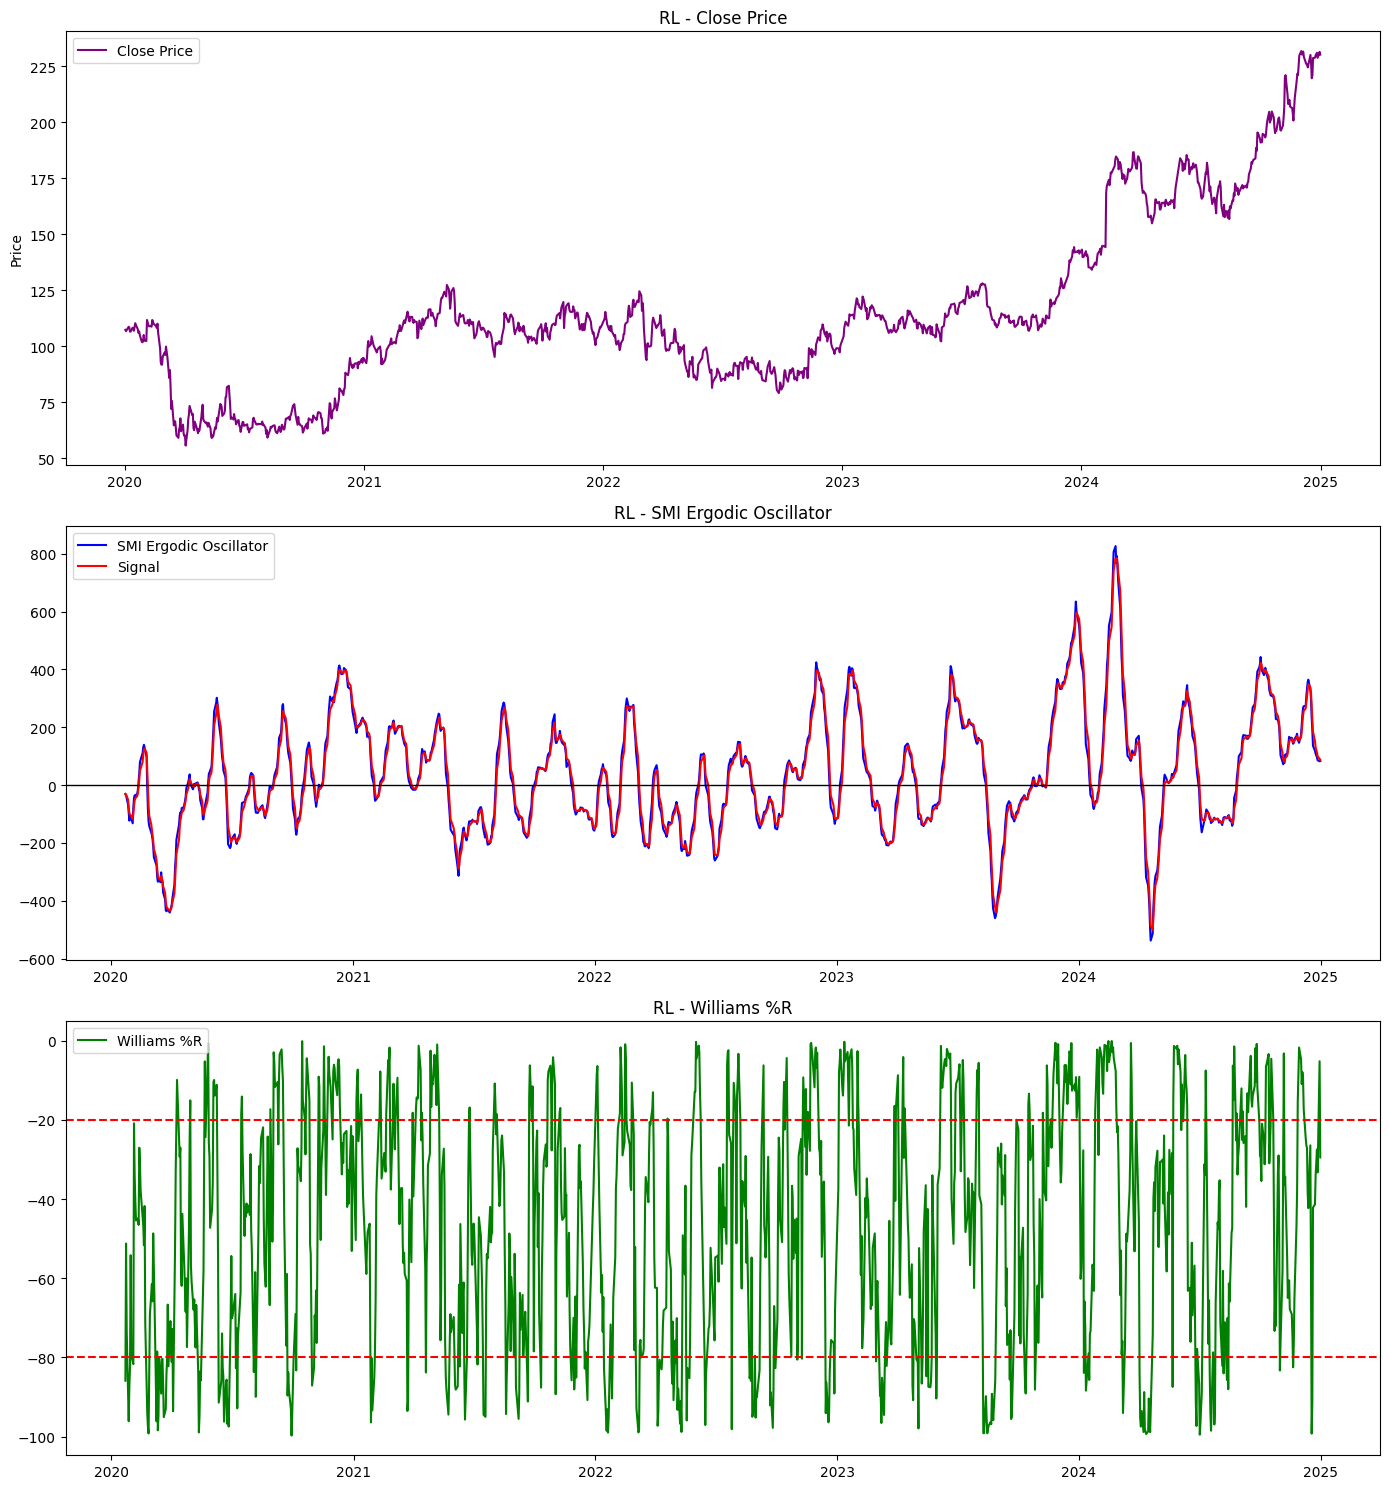

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate SMI Ergodic Oscillator
def calculate_smi(df, period=14, smooth=3):
    high_low = df['High'] - df['Low']
    high_low_ema = high_low.ewm(span=period, adjust=False).mean()
    close_diff = df['Close'] - df['Close'].shift(period)
    close_ema = close_diff.ewm(span=period, adjust=False).mean()
    smi = 100 * (close_ema / high_low_ema)
    smi_signal = smi.ewm(span=smooth, adjust=False).mean()
    return smi, smi_signal

# Function to calculate Williams %R
def calculate_williams_r(df, period=14):
    highest_high = df['High'].rolling(window=period).max()
    lowest_low = df['Low'].rolling(window=period).min()
    williams_r = -100 * (highest_high - df['Close']) / (highest_high - lowest_low)
    return williams_r

# Define the stock symbol and time period
symbol = 'RL'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate SMI Ergodic Oscillator and Signal
smi, smi_signal = calculate_smi(df)

# Calculate Williams %R
williams_r = calculate_williams_r(df)

# Plotting the indicators
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15))

# Plot Close Price
ax1.plot(df.index, df['Close'], label='Close Price', color='purple')
ax1.set_title(f'{symbol} - Close Price')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Plot SMI Ergodic Oscillator
ax2.plot(df.index, smi, label='SMI Ergodic Oscillator', color='blue')
ax2.plot(df.index, smi_signal, label='Signal', color='red')
ax2.axhline(0, color='black', linewidth=1)
ax2.set_title(f'{symbol} - SMI Ergodic Oscillator')
ax2.legend(loc='upper left')

# Plot Williams %R
ax3.plot(df.index, williams_r, label='Williams %R', color='green')
ax3.axhline(-20, color='red', linestyle='--')
ax3.axhline(-80, color='red', linestyle='--')
ax3.set_title(f'{symbol} - Williams %R')
ax3.legend(loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


Best Parameters: {'smi_period': 13, 'smi_smooth': 2, 'williams_r_period': 17}
Best Total Return: 2.072536714138221


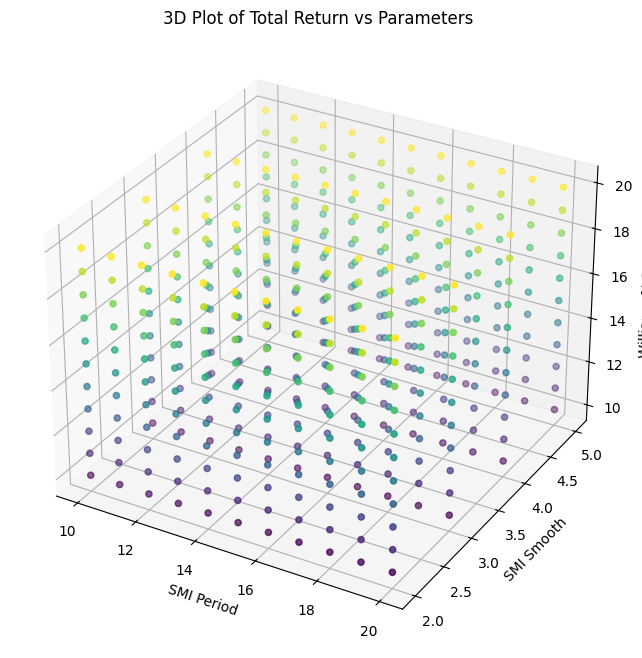

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate SMI Ergodic Oscillator
def calculate_smi(df, period=14, smooth=3):
    high_low = df['High'] - df['Low']
    high_low_ema = high_low.ewm(span=period, adjust=False).mean()
    close_diff = df['Close'] - df['Close'].shift(period)
    close_ema = close_diff.ewm(span=period, adjust=False).mean()
    smi = 100 * (close_ema / high_low_ema)
    smi_signal = smi.ewm(span=smooth, adjust=False).mean()
    return smi, smi_signal

# Function to calculate Williams %R
def calculate_williams_r(df, period=14):
    highest_high = df['High'].rolling(window=period).max()
    lowest_low = df['Low'].rolling(window=period).min()
    williams_r = -100 * (highest_high - df['Close']) / (highest_high - lowest_low)
    return williams_r

# Define the stock symbol and time period
symbol = 'RL'  # RL
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define function to generate Entry and Exit signals based on parameters
def generate_signals(df, smi_period, smi_smooth, williams_r_period):
    df['SMI'], df['SMI_Signal'] = calculate_smi(df, period=smi_period, smooth=smi_smooth)
    df['Williams_R'] = calculate_williams_r(df, period=williams_r_period)
    df_test = df.copy()

    # Filter data for the test period (2020-2025)
    df_test = df_test[(df_test.index.year >= 2020) & (df_test.index.year <= 2025)]
    df_test['Entry'] = (df_test['SMI'] > 0) & (df_test['Williams_R'] < -80)
    df_test['Exit'] = (df_test['SMI'] < 0) & (df_test['Williams_R'] > -20)
    return df_test

# Set ranges for parameter optimization
smi_period_range = range(10, 21)         # SMI period from 10 to 20
smi_smooth_range = range(2, 6)           # SMI smoothing period from 2 to 5
williams_r_period_range = range(10, 21)    # Williams %R period from 10 to 20

# Store the results for 3D plotting
results = []

# Function to evaluate the portfolio for given parameters
def evaluate_portfolio(smi_period, smi_smooth, williams_r_period):
    df_temp = generate_signals(df.copy(), smi_period, smi_smooth, williams_r_period)
    portfolio = vbt.Portfolio.from_signals(
        close=df_temp['Close'],
        entries=df_temp['Entry'],
        exits=df_temp['Exit'],
        init_cash=100_000,
        fees=0.001,
        slippage=0.002,
        freq='D'
    )
    return portfolio.total_return()

# Perform the parameter sweep using itertools.product
best_return = -np.inf
best_params = {}

for smi_period, smi_smooth, williams_r_period in itertools.product(
    smi_period_range, smi_smooth_range, williams_r_period_range
):
    total_ret = evaluate_portfolio(smi_period, smi_smooth, williams_r_period)
    results.append((smi_period, smi_smooth, williams_r_period, total_ret))

    if total_ret > best_return:
        best_return = total_ret
        best_params = {
            'smi_period': smi_period,
            'smi_smooth': smi_smooth,
            'williams_r_period': williams_r_period
        }

# Display best parameters and corresponding total return
print(f"Best Parameters: {best_params}")
print(f"Best Total Return: {best_return}")

# Plot the 3D surface plot for all parameter combinations
results = np.array(results)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract X, Y, Z values for 3D plot
x = results[:, 0]  # smi_period
y = results[:, 1]  # smi_smooth
z = results[:, 2]  # total_return

# Plot the surface
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel('SMI Period')
ax.set_ylabel('SMI Smooth')
ax.set_zlabel('Williams % R Period')
ax.set_title('3D Plot of Total Return vs Parameters')

plt.show()

# Plot the equity curve for the best parameters
df_best = generate_signals(
    df.copy(),
    best_params['smi_period'],
    best_params['smi_smooth'],
    best_params['williams_r_period']
)
portfolio_best = vbt.Portfolio.from_signals(
    close=df_best['Close'],
    entries=df_best['Entry'],
    exits=df_best['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)
portfolio_best.plot().show()


[*********************100%***********************]  1 of 1 completed


Best Parameters: {'smi_period': 5, 'smi_smooth': 1, 'williams_r_period': 16}
Best Total Return: 2.7927242281770472


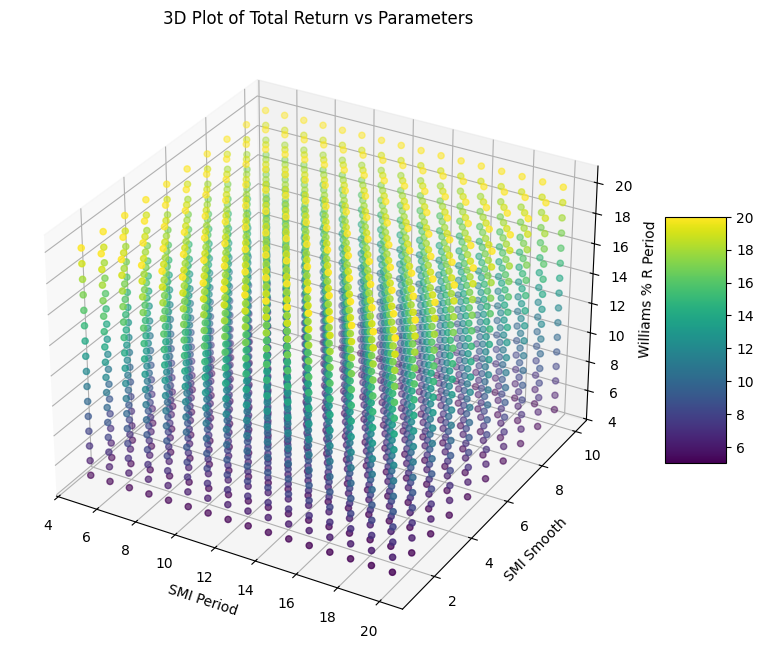

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           379272.422818
Total Return [%]                       279.272423
Benchmark Return [%]                   114.566619
Max Gross Exposure [%]                      100.0
Total Fees Paid                       1407.043522
Max Drawdown [%]                         28.10768
Max Drawdown Duration           389 days 00:00:00
Total Trades                                    3
Total Closed Trades                             3
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                100.0
Best Trade [%]                          94.195271
Worst Trade [%]                         38.958247
Avg Winning Trade [%]                   57.950293
Avg Losing Trade [%]                          NaN


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize

# Function to calculate SMI Ergodic Oscillator
def calculate_smi(df, period=14, smooth=3):
    high_low = df['High'] - df['Low']
    high_low_ema = high_low.ewm(span=period, adjust=False).mean()
    close_diff = df['Close'] - df['Close'].shift(period)
    close_ema = close_diff.ewm(span=period, adjust=False).mean()
    smi = 100 * (close_ema / high_low_ema)
    smi_signal = smi.ewm(span=smooth, adjust=False).mean()
    return smi, smi_signal

# Function to calculate Williams %R
def calculate_williams_r(df, period=14):
    highest_high = df['High'].rolling(window=period).max()
    lowest_low = df['Low'].rolling(window=period).min()
    williams_r = -100 * (highest_high - df['Close']) / (highest_high - lowest_low)
    return williams_r

# Define the stock symbol and time period
symbol = 'RL'  # RL
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define function to generate Entry and Exit signals based on parameters
def generate_signals(df, smi_period, smi_smooth, williams_r_period):
    df['SMI'], df['SMI_Signal'] = calculate_smi(df, period=smi_period, smooth=smi_smooth)
    df['Williams_R'] = calculate_williams_r(df, period=williams_r_period)
    df_test = df.copy()

    # Filter data for the test period (2020-2025)
    df_test = df_test[(df_test.index.year >= 2020) & (df_test.index.year <= 2025)]
    df_test['Entry'] = (df_test['SMI'] > 0) & (df_test['Williams_R'] < -80)
    df_test['Exit'] = (df_test['SMI'] < 0) & (df_test['Williams_R'] > -20)
    return df_test

# Set ranges for parameter optimization
smi_period_range = range(5, 21)         # SMI period from 5 to 20
smi_smooth_range = range(1, 11)           # SMI smoothing period from 1 to 10
williams_r_period_range = range(5, 21)    # Williams %R period from 5 to 20

# Store the results for 3D plotting
results = []

# Function to evaluate the portfolio for given parameters
def evaluate_portfolio(smi_period, smi_smooth, williams_r_period):
    df_temp = generate_signals(df.copy(), smi_period, smi_smooth, williams_r_period)
    portfolio = vbt.Portfolio.from_signals(
        close=df_temp['Close'],
        entries=df_temp['Entry'],
        exits=df_temp['Exit'],
        init_cash=100_000,
        fees=0.001,
        slippage=0.002,
        freq='D'
    )
    return portfolio.total_return()

# Perform the parameter sweep using itertools.product
best_return = -np.inf
best_params = {}

for smi_period, smi_smooth, williams_r_period in itertools.product(
    smi_period_range, smi_smooth_range, williams_r_period_range
):
    total_ret = evaluate_portfolio(smi_period, smi_smooth, williams_r_period)
    results.append((smi_period, smi_smooth, williams_r_period, total_ret))

    if total_ret > best_return:
        best_return = total_ret
        best_params = {
            'smi_period': smi_period,
            'smi_smooth': smi_smooth,
            'williams_r_period': williams_r_period
        }

# Display best parameters and corresponding total return
print(f"Best Parameters: {best_params}")
print(f"Best Total Return: {best_return}")

# Plot the 3D surface plot for all parameter combinations
results = np.array(results)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract X, Y, Z values for 3D plot
x = results[:, 0]  # smi_period
y = results[:, 1]  # smi_smooth
z = results[:, 2]  # total_return

# Normalize the z-values for better color mapping
norm = Normalize(vmin=z.min(), vmax=z.max())
cmap = cm.viridis

# Plot the surface with color mapping
sc = ax.scatter(x, y, z, c=z, cmap=cmap, norm=norm, marker='o')

# Labels and title
ax.set_xlabel('SMI Period')
ax.set_ylabel('SMI Smooth')
ax.set_zlabel('Williams % R Period')
ax.set_title('3D Plot of Total Return vs Parameters')

# Add color bar
fig.colorbar(sc, ax=ax, shrink=0.4, aspect=4)

plt.show()

# Plot the equity curve for the best parameters
df_best = generate_signals(
    df.copy(),
    best_params['smi_period'],
    best_params['smi_smooth'],
    best_params['williams_r_period']
)
portfolio_best = vbt.Portfolio.from_signals(
    close=df_best['Close'],
    entries=df_best['Entry'],
    exits=df_best['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)
portfolio_best.plot().show()

print(portfolio_best.stats())
